In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train1 = pd.read_csv('/kaggle/input/titanic/train.csv')
test1 = pd.read_csv('/kaggle/input/titanic/test.csv')

train = train1
test = test1 

In [4]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#train.isnull().allsum()

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

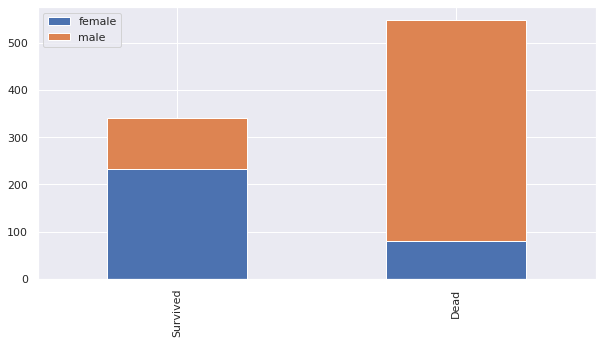

In [9]:
feature_selected = 'Sex'
# suvived 중 생존자의 성별비율 
F_survived = train[train['Survived']==1][feature_selected].value_counts()
F_dead = train[train['Survived']==0][feature_selected].value_counts()
F_df = pd.DataFrame([F_survived,F_dead])
F_df.index = ['Survived','Dead']
F_df.plot(kind='bar', stacked = 'True', figsize =(10,5))

<AxesSubplot:>

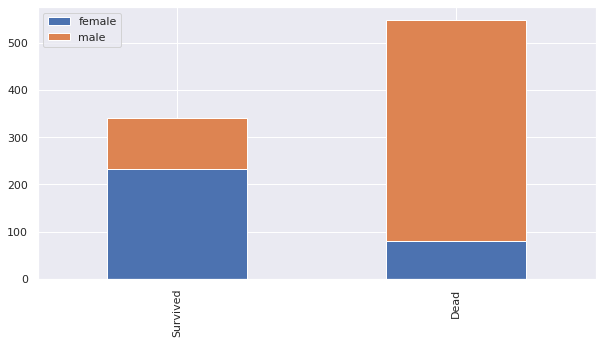

In [10]:
feature_selected = 'Sex'
F_survived = train[train['Survived']==1][feature_selected].value_counts()
F_dead = train[train['Survived']==0][feature_selected].value_counts()
F_df = pd.DataFrame([F_survived,F_dead])
F_df.index = ['Survived','Dead']
F_df.plot(kind='bar', stacked = 'False', figsize =(10,5))

In [11]:
display(F_survived, F_dead)

female    233
male      109
Name: Sex, dtype: int64

male      468
female     81
Name: Sex, dtype: int64

In [12]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
TDF = pd.DataFrame(train1)

TDF1 = TDF.iloc[:, [0,1,2,4,5,6]]
TDF1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp
0,1,0,3,male,22.0,1
1,2,1,1,female,38.0,1
2,3,1,3,female,26.0,0
3,4,1,1,female,35.0,1
4,5,0,3,male,35.0,0


In [14]:
# pivot_table (데이터, 인덱스:인덱스열 그룹화할 키 , 컬럼:데이터 열에서 그룹화할 키 ,
# aggfunc: 대체값)
TDF2 = TDF1.pivot_table('Survived', index='Sex',
                       columns = 'Pclass', aggfunc='mean')

<AxesSubplot:title={'center':'Average Survivors rates'}, xlabel='Sex'>

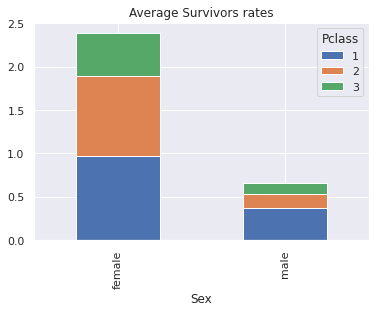

In [15]:
TDF2.plot(kind='bar', stacked=True, title= 'Average Survivors rates')

In [16]:
#정규식 A-Za-z : 알바펫 대소문자만 출력 
train = train1

train_test_data = [train,test]

for two_data in train_test_data:
    two_data['Title'] = two_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [21]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
train.groupby('Title').mean()['Survived']

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [23]:
# 타이틀데이터에 직업별로 번호 지정해주기
Title_mapping = {"Mr":0, "Rev":0, "Don":0, "Capt":0, "Jonkheer":0,
                "Miss":1, "Ms":1,
                "Mrs":2, "Lady":2, "Dona":2, "Mme":2, "Countess":2,
                'Master':3, "Dr":3, "Mile":3,
                "Col":4, "Major":4, "Sir":4}

for two_data in train_test_data:
    two_data['Title'] = two_data['Title'].map(Title_mapping)


In [24]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0


In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [26]:
train['Title'].value_counts()

0.0    526
1.0    183
2.0    128
3.0     47
4.0      5
Name: Title, dtype: int64

In [27]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2


In [28]:
test['Title'].value_counts()

0    242
1     79
2     73
3     22
4      2
Name: Title, dtype: int64

In [29]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

<AxesSubplot:>

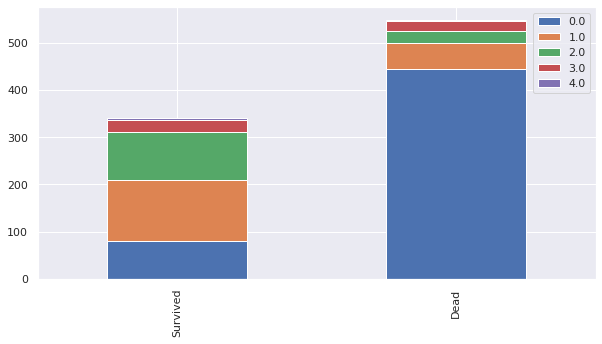

In [30]:
feature_selected = 'Title'
# survived 컬럼중 생존자/사망자 놔눠서 title별 비율 그려보기 
F_survived = train[train['Survived']==1][feature_selected].value_counts()
F_dead = train[train['Survived']==0][feature_selected].value_counts()
F_df = pd.DataFrame([F_survived,F_dead])
F_df.index = ['Survived','Dead']
F_df.plot(kind='bar', stacked = 'False', figsize =(10,5))

In [31]:
sex_mapping = {'male':0, 'female':1}
# 성별 번호로 나누기 
for two_data in train_test_data:
    two_data['Sex'] = two_data['Sex'].map(sex_mapping)

In [32]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0


In [33]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2


<AxesSubplot:>

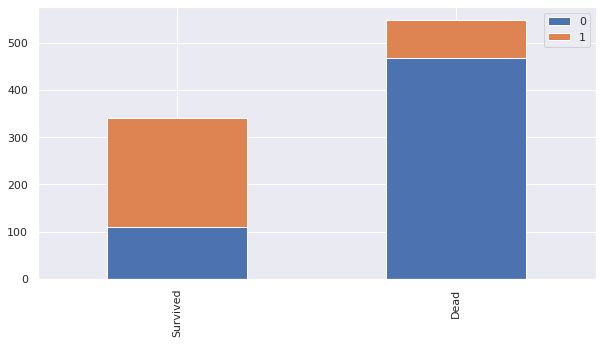

In [34]:
feature_selected = 'Sex'
# survived별 사망자/생존자를 성별비율로 그래프 그려보기
F_survived = train[train['Survived']==1][feature_selected].value_counts()
F_dead = train[train['Survived']==0][feature_selected].value_counts()
F_df = pd.DataFrame([F_survived,F_dead])
F_df.index = ['Survived','Dead']
F_df.plot(kind='bar', stacked = 'False', figsize =(10,5))

In [35]:
# 'age'의 결측치 직업별로 묶은 그룹에서 나이의 평균을 추출해서 변환시킴 
train['Age'].fillna(train.groupby('Title')['Age'].transform('mean'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('mean'), inplace=True)

In [36]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [37]:
train['Age'].describe(), test['Age'].describe()

(count    891.000000
 mean      29.781869
 std       13.253343
 min        0.420000
 25%       21.816327
 50%       30.000000
 75%       35.873874
 max       80.000000
 Name: Age, dtype: float64,
 count    418.000000
 mean      30.220299
 std       12.977093
 min        0.170000
 25%       21.831133
 50%       30.000000
 75%       36.875000
 max       76.000000
 Name: Age, dtype: float64)

In [38]:
# aspect 가로세로를 의미함 

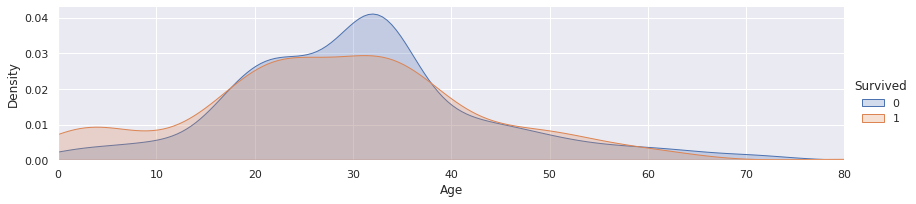

In [39]:
# 트레이닝 데이터를 베이스로 survived 생존자로 구분짓고 , 나이대로 구분하는 그래프 생성 
facet = sns.FacetGrid(train,
                     hue = 'Survived', aspect = 4 )
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()

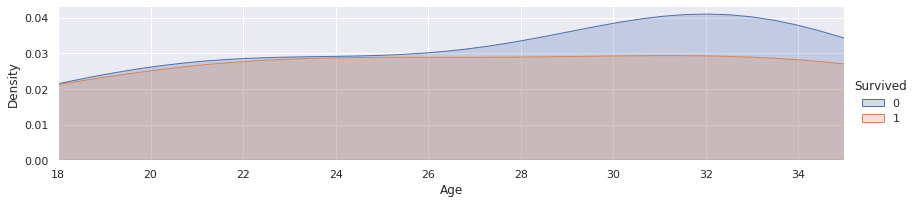

In [40]:
import matplotlib.pyplot as plt

facet = sns.FacetGrid(train,
                     hue = 'Survived', aspect = 4 )
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
# 나이대 비율 지정
plt.xlim(18,35)

plt.show()

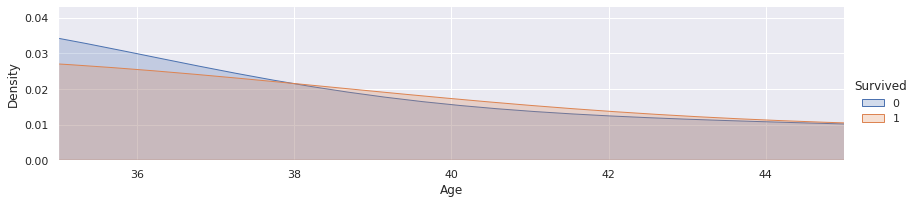

In [41]:
import matplotlib.pyplot as plt

facet = sns.FacetGrid(train,
                     hue = 'Survived', aspect = 4 )
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()

plt.xlim(35,45)

plt.show()

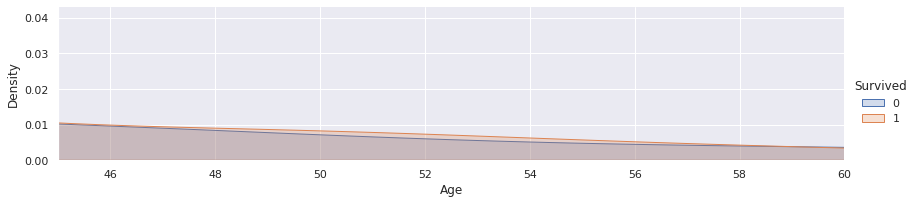

In [42]:
import matplotlib.pyplot as plt

facet = sns.FacetGrid(train,
                     hue = 'Survived', aspect = 4 )
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()

plt.xlim(45,60)

plt.show()

In [43]:
# 라벨인코딩과 같이 나이대별 숫자 간소화 (전처리과정을 쉽게)
for two_data in train_test_data:
    two_data.loc[two_data['Age']<=18, 'Age'] = 0
    two_data.loc[(two_data['Age']>18) & (two_data['Age']<=35), 'Age'] = 1
    two_data.loc[(two_data['Age']>35) & (two_data['Age']<=45), 'Age'] = 2
    two_data.loc[(two_data['Age']>45) & (two_data['Age']<=60), 'Age'] = 3
    two_data.loc[two_data['Age']>60 , 'Age'] = 4

In [44]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2.0


In [45]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2


<AxesSubplot:>

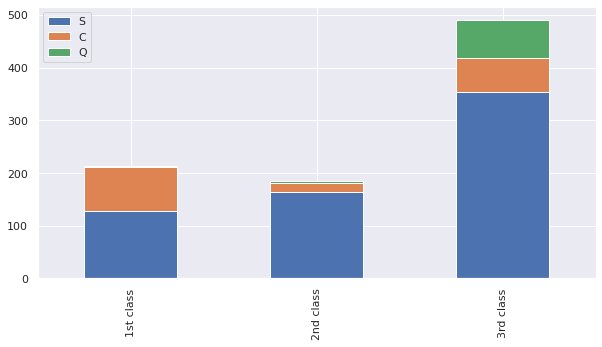

In [46]:
Pclass_1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass_2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass_3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass_1, Pclass_2, Pclass_3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize = (10,5))

In [47]:
for two_data in train_test_data:
    two_data['Embarked'] = two_data["Embarked"].fillna('S')

In [48]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [49]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}

for two_data in train_test_data:
    two_data["Embarked"] = two_data["Embarked"].map(embarked_mapping)

In [50]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0


In [51]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,2,0


In [52]:
test['Fare'].fillna(test.groupby("Pclass")['Fare'].transform('median'), inplace=True)

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


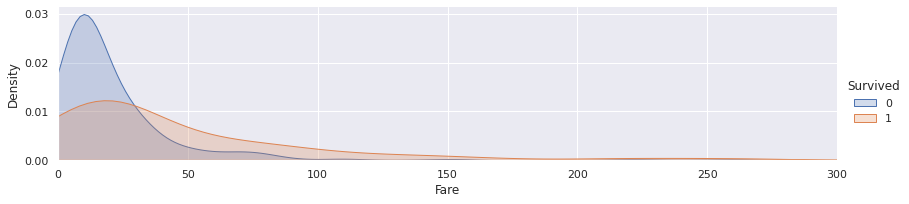

In [54]:
facet = sns.FacetGrid(train,
                     hue = 'Survived', aspect = 4 )
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim = (0,train['Fare'].max()))

facet.add_legend()

plt.xlim(0,300)

plt.show()

In [55]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

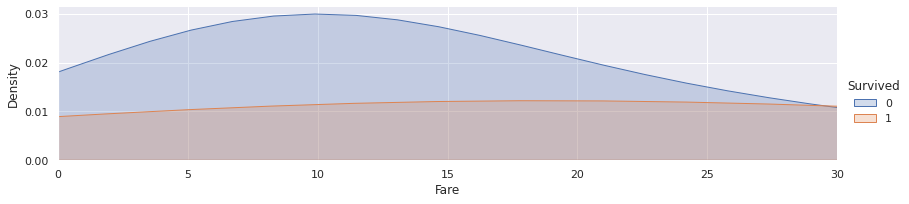

In [56]:
facet = sns.FacetGrid(train,
                     hue = 'Survived', aspect = 4 )
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim = (0,train['Fare'].max()))

facet.add_legend()

plt.xlim(0,30)

plt.show()

In [57]:
two_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,1.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1.0,0,0,A.5. 3236,8.0500,NaN,0,0
414,1306,1,1,2.0,0,0,PC 17758,108.9000,C105,1,2
415,1307,3,0,2.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0
416,1308,3,0,1.0,0,0,359309,8.0500,NaN,0,0


In [58]:
for two_data in train_test_data:
    two_data.loc[two_data['Fare']<=5, 'Fare'] = 0
    two_data.loc[(two_data['Fare']>5) & (two_data['Fare']<=15), 'Fare'] = 1
    two_data.loc[(two_data['Fare']>15) & (two_data['Fare']<=30), 'Fare'] = 2
    two_data.loc[(two_data['Fare']>30) & (two_data['Fare']<=100), 'Fare'] = 3
    two_data.loc[two_data['Fare']>100 , 'Fare'] = 4

In [59]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,1.0,NaN,0,0.0
1,2,1,1,1,2.0,1,0,PC 17599,3.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1.0,NaN,0,1.0
3,4,1,1,1,1.0,1,0,113803,3.0,C123,0,2.0
4,5,0,3,0,1.0,0,0,373450,1.0,NaN,0,0.0


In [60]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1.0,0,0,330911,1.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,1.0,NaN,0,2
2,894,2,0,4.0,0,0,240276,1.0,NaN,2,0
3,895,3,0,1.0,0,0,315154,1.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,1.0,NaN,0,2


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        889 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [63]:
train['Cabin'].isnull().sum(), test['Cabin'].isnull().sum()

(687, 327)

In [64]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [65]:
for two_data in train_test_data:
    two_data["Cabin"] = two_data["Cabin"].str[:1]
    
train["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [66]:
test["Cabin"].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [67]:
train[train["Pclass"]==1]['Cabin'].value_counts()

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

In [68]:
train[train["Pclass"]==2]['Cabin'].value_counts()

F    8
D    4
E    4
Name: Cabin, dtype: int64

In [69]:
train[train["Pclass"]==3]['Cabin'].value_counts()

F    5
G    4
E    3
Name: Cabin, dtype: int64

<AxesSubplot:>

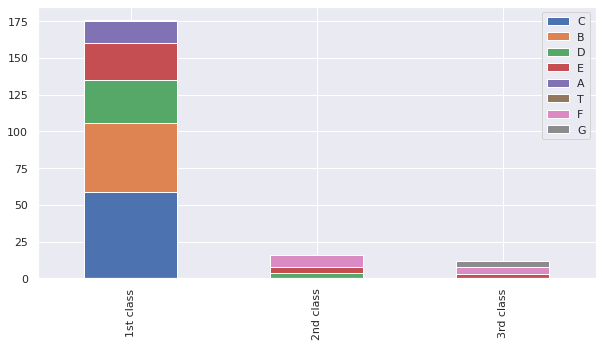

In [70]:
Pclass_1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass_2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass_3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass_1, Pclass_2, Pclass_3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize = (10,5))

In [71]:
cabin_mapping = {'A':2, 'B':2, 'C':2, 'T':2,
                'D':1, 'G':1,
                'E':0, 'F':0}

for two_data in train_test_data:
    two_data['Cabin'] = two_data['Cabin'].map(cabin_mapping)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,1.0,NaN,0,0.0
1,2,1,1,1,2.0,1,0,PC 17599,3.0,2.0,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1.0,NaN,0,1.0
3,4,1,1,1,1.0,1,0,113803,3.0,2.0,0,2.0
4,5,0,3,0,1.0,0,0,373450,1.0,NaN,0,0.0


In [73]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1.0,0,0,330911,1.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,1.0,NaN,0,2
2,894,2,0,4.0,0,0,240276,1.0,NaN,2,0
3,895,3,0,1.0,0,0,315154,1.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,1.0,NaN,0,2


In [74]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),  inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),  inplace=True)

In [75]:
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        418 non-null    float64
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [76]:
train['familysize'] = train['SibSp'] + train['Parch'] +1
test['familysize'] = test['SibSp'] + test['Parch'] +1

In [77]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familysize
0,1,0,3,0,1.0,1,0,A/5 21171,1.0,0.0,0,0.0,2
1,2,1,1,1,2.0,1,0,PC 17599,3.0,2.0,1,2.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1.0,0.0,0,1.0,1
3,4,1,1,1,1.0,1,0,113803,3.0,2.0,0,2.0,2
4,5,0,3,0,1.0,0,0,373450,1.0,0.0,0,0.0,1


In [78]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familysize
0,892,3,0,1.0,0,0,330911,1.0,0.0,2,0,1
1,893,3,1,3.0,1,0,363272,1.0,0.0,0,2,2
2,894,2,0,4.0,0,0,240276,1.0,0.0,2,0,1
3,895,3,0,1.0,0,0,315154,1.0,0.0,0,0,1
4,896,3,1,1.0,1,1,3101298,1.0,0.0,0,2,3


In [79]:
train['familysize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: familysize, dtype: int64

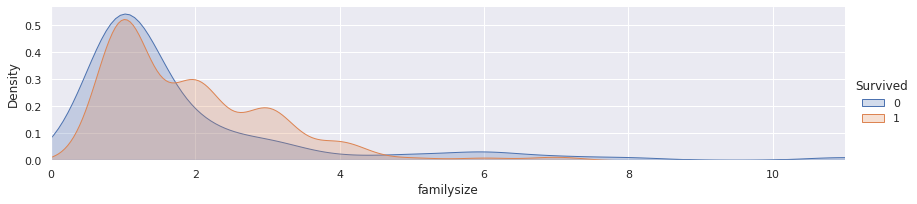

In [80]:
facet = sns.FacetGrid(train,
                     hue = 'Survived', aspect = 4 )
facet.map(sns.kdeplot, 'familysize', shade=True)
facet.set(xlim = (0,train['familysize'].max()))

facet.add_legend()

#plt.xlim(0,300)

plt.show()

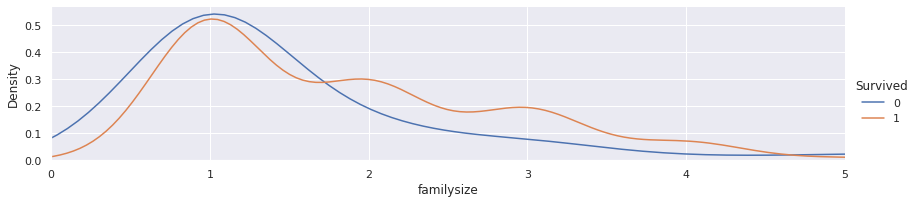

In [81]:
# shade가 False일시의 차이 
facet = sns.FacetGrid(train,
                     hue = 'Survived', aspect = 4 )
facet.map(sns.kdeplot, 'familysize', shade=False)
facet.set(xlim = (0,train['familysize'].max()))

facet.add_legend()

plt.xlim(0,5)

plt.show()

In [82]:
for two_data in train_test_data:
    two_data.loc[two_data['familysize']<=1, 'familysize'] = 0
    two_data.loc[(two_data['familysize']>1) & (two_data['familysize']<=2), 'familysize'] = 2
    two_data.loc[(two_data['familysize']>2) & (two_data['familysize']<=5), 'familysize'] = 3
    two_data.loc[two_data['familysize']>5 , 'familysize'] = 1

In [83]:
train['familysize'].value_counts()

0    537
2    161
3    146
1     47
Name: familysize, dtype: int64

In [84]:
test['familysize'].value_counts()

0    253
3     78
2     74
1     13
Name: familysize, dtype: int64

In [85]:
train["Title"].value_counts()

0.0    526
1.0    183
2.0    128
3.0     47
4.0      5
Name: Title, dtype: int64

In [86]:
train["Title"] = train["Title"].fillna("0.0")

In [87]:
train["Title"].isnull().sum()

0

In [88]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    object 
 12  familysize   891 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

(None, None)

In [89]:
feature_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(feature_drop, axis=1)
train = train.drop('PassengerId', axis=1)

test = test.drop(feature_drop, axis=1)

train_x = train.drop('Survived', axis=1)
train_y = train['Survived']

In [90]:
train_x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,familysize
0,3,0,1.0,1.0,0.0,0,0.0,2
1,1,1,2.0,3.0,2.0,1,2.0,2
2,3,1,1.0,1.0,0.0,0,1.0,0
3,1,1,1.0,3.0,2.0,0,2.0,2
4,3,0,1.0,1.0,0.0,0,0.0,0


In [91]:
train_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [92]:
test.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,familysize
0,892,3,0,1.0,1.0,0.0,2,0,0
1,893,3,1,3.0,1.0,0.0,0,2,2


In [93]:
train_x.info() , test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    object 
 7   familysize  891 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non

(None, None)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state =123)

In [95]:
k_clf = KNeighborsClassifier(n_neighbors =10)
scoring1 = 'accuracy'

score = cross_val_score(k_clf, train_x, train_y,
                       cv=k_fold, scoring = scoring1)
print(round(np.mean(score)*100,2))

80.02


In [96]:
d_clf = DecisionTreeClassifier()
scoring1 = 'accuracy'

score = cross_val_score(d_clf, train_x, train_y,
                       cv=k_fold, scoring = scoring1)
print(round(np.mean(score)*100,2))

80.92


In [97]:
r_clf = RandomForestClassifier(n_estimators=15)
scoring1 = 'accuracy'

score = cross_val_score(r_clf, train_x, train_y,
                       cv=k_fold, scoring = scoring1)
print(round(np.mean(score)*100,2))

81.03


In [98]:
g_clf = GaussianNB()
scoring1 = 'accuracy'

score = cross_val_score(g_clf, train_x, train_y,
                       cv=k_fold, scoring = scoring1)
print(round(np.mean(score)*100,2))

75.87


In [99]:
s_clf = SVC()
scoring1 = 'accuracy'

score = cross_val_score(s_clf, train_x, train_y,
                       cv=k_fold, scoring = scoring1)
print(round(np.mean(score)*100,2))

83.05


In [100]:
s_clf = SVC()
s_clf.fit(train_x, train_y)

test_x = test.drop("PassengerId",axis=1).copy()
prediction = s_clf.predict(test_x)

submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':prediction})
submission.to_csv('submission0112.csv', index=False)